# Experiment 3: Concave Grating Spectrometer 

## Ashmit Bathla, 210216. 
## 10th Febuary 2025 

In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [2]:
# set default params for matplotlib : 
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
# read all the data form the excel file : 
data_dict = {f'Linear-Order-{i+1}' : pd.read_excel('data.xlsx' , sheet_name=i) for i in range(2)}
data_dict.update( {f'Angular-Order-{i-1}' : pd.read_excel('data.xlsx' , sheet_name=i) for i in range(2,4)} )
data_dict['Sodium'] = pd.read_excel('data.xlsx' , sheet_name=-1)

In [4]:
# list to store interpolated results : 
sodium_wavelenght = np.array([])

In [5]:
# define function to plot the clabration curves and get the iterpolated values
# the given data set 

def calibrate_interpolate(x,y,p,order:int): 
    '''
        param x: independet variable of the data. 
        param y: give data points of the function.
        param p: list of points to intepolate on.  
        returns : interpolated values of y(p). 
    '''
    
    if( type(x) == list ): 
        x = np.array( x )
    if( type(y) == list ): 
        y = np.array( y )
    if( type(p) == list ): 
        p = np.array(p)
    
    # get the linear interpolated results : 
    q = np.interp( p , x , y )
    
    # plot the curves : 
    plt.plot( x , y , linewidth = 3 )
    plt.scatter( x , y , linewidths=2 , label = 'Recorded Data Point')
    plt.scatter( p , q  , color = 'r' , marker = '|' , s = 160 , label = 'Interpolated Points')
    plt.xlabel(r'Linear Distance from the Slit $X$ ($cm$)')
    plt.ylabel(r'Wavelength $\lambda$ ($nm$)')
    plt.grid()
    plt.title(fr'$X$ vs $\lambda$ Calibration Curve of Hg for Order {order}')
    plt.legend()
    plt.show()
    
    # return the slope of the regression line 
    return q 

In [6]:
print('--------Reading for the Sodium Lamp--------')
sodium_data = data_dict['Sodium']
sodium_data

--------Reading for the Sodium Lamp--------


,Linear Distance (cm),Color,Order
0,13.94,Yellow(1),1
1,13.98,Yellow(2),1
2,29.23,Yellow(1),2
3,29.25,Yellow(2),2


--------Linear Readings for Order 1 Bands of Hg--------


,Linear Distance (cm),Color,Wavelength (nm)
0,10.00,Violet[Deep],404.7
1,11.54,Blue/Green,491.6
2,12.91,Green,546.1
3,13.72,Yellow-Orange(1),577.0
4,13.78,Yellow-Orange(2),579.1
5,14.69,Red(1),623.4
6,14.76,Red(2),690.8


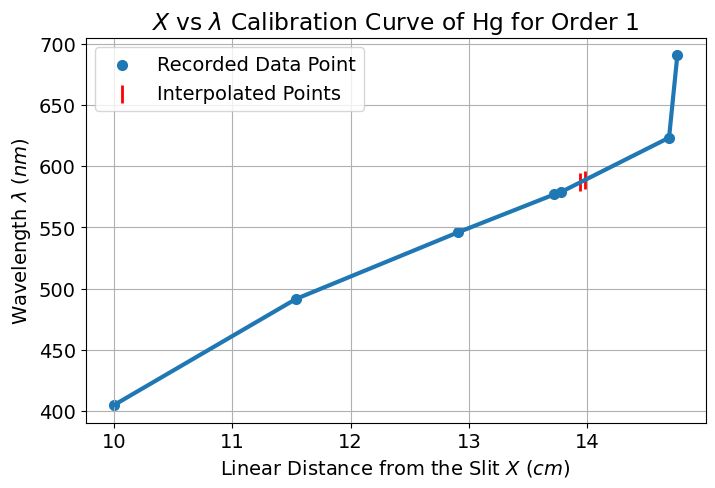

array([586.88901099, 588.83626374])

In [7]:
print('--------Linear Readings for Order 1 Bands of Hg--------')
display( data_dict['Linear-Order-1'] ) 

p = sodium_data['Linear Distance (cm) '].to_numpy()[:2]
q = calibrate_interpolate(
    x = data_dict['Linear-Order-1']['Linear Distance (cm) '].to_numpy() , 
    y = data_dict['Linear-Order-1']['Wavelength (nm)'].to_numpy() , p = p , order = 1 
)

sodium_wavelenght = np.append( sodium_wavelenght , q )
q 

--------Linear Readings for Order 2 Bands of Hg--------


,Linear Distance (cm),Color,Wavelength (nm)
0,21.24,Violet[Deep],404.7
1,21.38,Violet,407.8
2,24.17,Blue/Green,491.6
3,27.00,Green,546.1
4,28.60,Yellow-Orange(1),577.0
5,28.72,Yellow-Orange(2),579.1
6,30.60,Red(1),623.4
7,30.91,Red(2),690.8


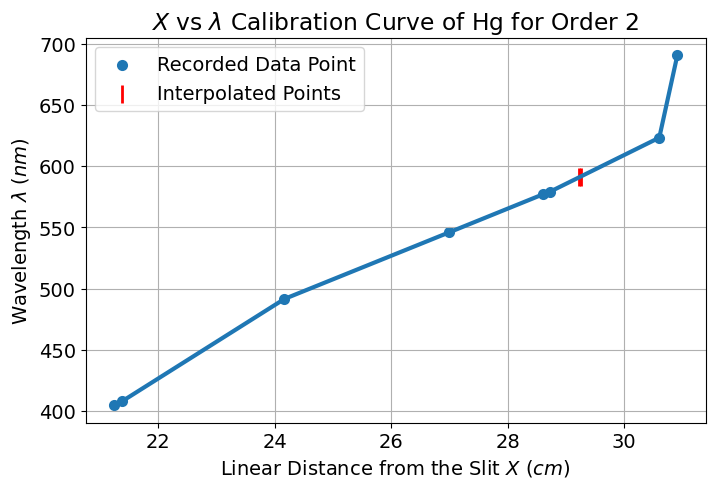

array([591.11755319, 591.58882979])

In [8]:
print('--------Linear Readings for Order 2 Bands of Hg--------')
display( data_dict['Linear-Order-2'] ) 

p = sodium_data['Linear Distance (cm) '].to_numpy()[2:]
q = calibrate_interpolate(
    x = data_dict['Linear-Order-2']['Linear Distance (cm) '].to_numpy() , 
    y = data_dict['Linear-Order-2']['Wavelength (nm)'].to_numpy() , p = p , order = 2
)

sodium_wavelenght = np.append( sodium_wavelenght , q )
q

In [9]:
print('--------Angular Readings for Order 1 Bands of Hg--------')
data_dict['Angular-Order-1']

--------Angular Readings for Order 1 Bands of Hg--------


,Angular Distance (*),Color,Wavelength (nm)
0,3.8,Violet[Deep],404.7
1,2.0,Blue/Green,491.6
2,0.0,Green,546.1
3,-0.8,Yellow-Orange(1),577.0
4,-1.0,Yellow-Orange(2),579.1
5,-2.2,Red(1),623.4
6,-2.4,Red(2),690.8


In [10]:
print('--------Angular Readings for Order 2 Bands of Hg--------')
data_dict['Angular-Order-2']

--------Angular Readings for Order 2 Bands of Hg--------


,Angular Distance (*),Color,Wavelength (nm)
0,7.8,Violet[Deep],404.7
1,7.6,Violet,407.8
2,3.8,Blue/Green,491.6
3,0.0,Green,546.1
4,-2.2,Yellow-Orange(1),577.0
5,-2.4,Yellow-Orange(2),579.1
6,-4.8,Red(1),623.4
7,-5.2,Red(2),690.8


In [11]:
sodium_data['Calculated Wavelenght (nm)'] = sodium_wavelenght 
sodium_data

,Linear Distance (cm),Color,Order,Calculated Wavelenght (nm)
0,13.94,Yellow(1),1,586.889011
1,13.98,Yellow(2),1,588.836264
2,29.23,Yellow(1),2,591.117553
3,29.25,Yellow(2),2,591.588830
